## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Collection

In [3]:
# loading the dataset
wine_data = pd.read_csv('/content/winequality-red.csv')

In [4]:
# checking for numbers of rows and columns
wine_data.shape

(1599, 12)

In [5]:
# first five rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking for missing values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Data Analysis & Visulaization

In [7]:
# statistical measure of the dataset
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<ipython-input-13-2f41a636f2fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data=wine_data, kind='count',palette=palette)


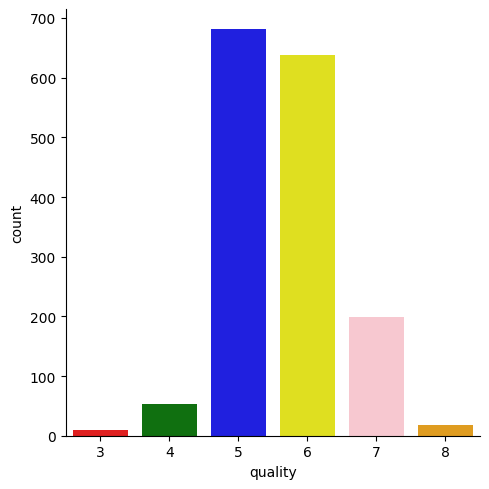

In [13]:
# number of values for each quality
palette=['red','green','blue','yellow','pink','orange']
sns.catplot(x='quality', data=wine_data, kind='count',palette=palette)

<ipython-input-18-7ce20479cfe8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='volatile acidity',data=wine_data,palette=palette)


<Axes: xlabel='quality', ylabel='volatile acidity'>

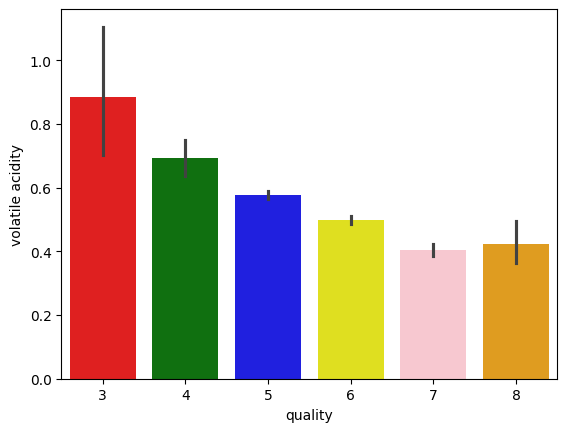

In [18]:
# volatile acidity vs quality
sns.barplot(x='quality',y='volatile acidity',data=wine_data,palette=palette)

<ipython-input-17-26028520db74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='citric acid',data=wine_data,palette=palette)


<Axes: xlabel='quality', ylabel='citric acid'>

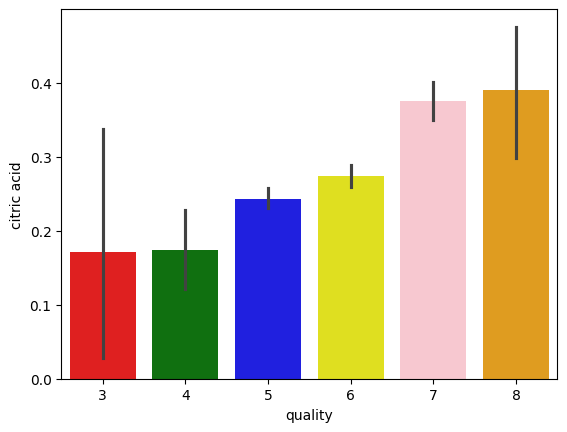

In [17]:
# critic acid vs quality
sns.barplot(x='quality',y='citric acid',data=wine_data,palette=palette)

## Correlation
### 1.Positive Correlation
### 2.Negative Correlation

In [19]:
correlation = wine_data.corr()

<Axes: >

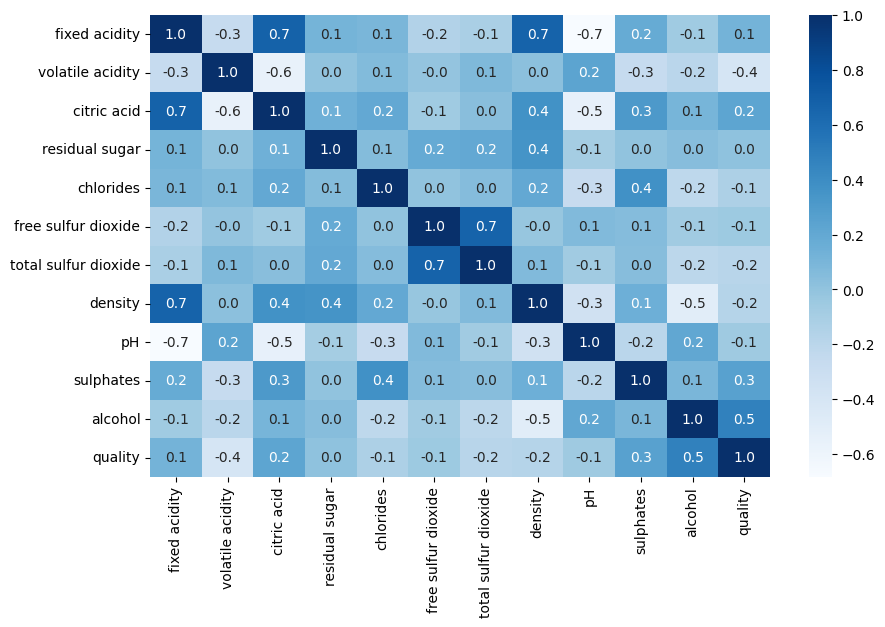

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='.1f')

## Data Preprocessing

In [27]:
# separate the data and label
X = wine_data.drop('quality',axis=1)

In [28]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [30]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [44]:
print(y)


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Train & Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3,stratify=y)

## Model Training

In [33]:
model = RandomForestClassifier()

In [34]:
model.fit(X_train,y_train)

RandomForestClassifier()

## Model Evaluation

In [36]:
y_pred = model.predict(X_test)


In [39]:
accuracy = accuracy_score(y_test,y_pred)

In [40]:
print(f'Accuracy Score : {accuracy}')

Accuracy Score : 0.90625


In [41]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
